## Data Science Blog

*I have chosen "Titanic" for this analysis to do anlysis and communicate my findings.*
*This will include univariate, bi-variate, multivariate analsis*

*Further in the analysis we will get to know more about the data and what all variables having in the data set.

*In this analysis we will try to answer some key questions that are interested to know.

In [1]:
import os
os.getcwd()

'/home/workspace'

In [60]:
os.chdir('C:\\Users\\POCHIVI1\\OneDrive - Novartis Pharma AG\\Desktop\\Udacity')

In [61]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
% matplotlib inline

In [62]:
df = pd.read_csv('titanic.csv')

# Exploratory Analysis

In [63]:
df.shape

(891, 12)

*Here we have 891 records and 12 variables. out of which "Survived,Pclass,Sex,Embarked,Name, Ticket" are nominal Sec, Pclass are categorical.*

In [64]:
pd.set_option("display.max_columns", len(df.columns))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


*From above details we can see that age is present only for 714 records. 
*Embarked has 2 missing values*

In [66]:
df.PassengerId = df.PassengerId.astype(str)

In [67]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*We can remove variables like "Passangerid, name, Ticket" which don't add any information for our analysis. An individual is not interest to us.*

In [68]:
df  = df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1)

*"Fare,Age" to be int*

In [69]:
df['Fare'] = df['Fare'].astype(int)

*However Age contains null values, we have to deal with those before that.*

In [70]:
age_mean = df['Age'].mean()
age_std = df['Age'].std()
age_na = df['Age'].isnull().sum()
age_na

177

**Trying create some random age value by using mean and standard deviation of variable "age" and will use those random values to fill nas.**

In [71]:
age_random = np.random.randint(age_mean - age_std, high=age_mean + age_std, size=age_na)

In [72]:
df['Age'][np.isnan(df['Age'])] = age_random

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
men_age = np.round(df[df['Sex'] == "male"]['Age'].mean())

In [74]:
female_age = np.round(df[df['Sex'] == "female"]['Age'].mean())

In [75]:
df['Age'].isnull().sum()

0

In [76]:
df['Age'] = df['Age'].astype(int)

### DIstribution of age

In [77]:
df.Age.value_counts().head()

24    41
36    35
30    35
18    34
22    33
Name: Age, dtype: int64

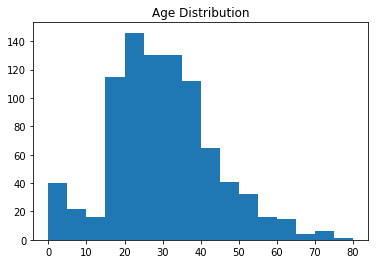

In [103]:
bin_edges = np.arange(0, df['Age'].max()+5, 5)
plt.hist(data = df, x = 'Age', bins = bin_edges)
plt.title("Age Distribution");

#### Observations

*From above graph we can say that distribution is right skewed. Some missing values have been replaced by simulated data. That could also be a reason. If we assume that data is available for all passangers.. it is right skewed, *

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


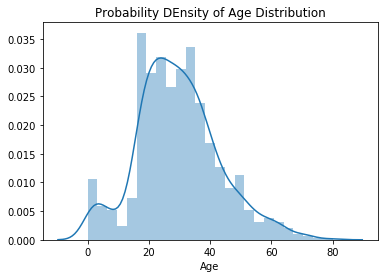

In [113]:
sb.distplot(df['Age'])
plt.title("Probability DEnsity of Age Distribution");

*From above plot we can see that most no of passangers are in the age bracket 15 - 40*

*Creating a new category "child" those who are less than 18 in age here we considered as children. 
As this will help us to know if this has shown any significant reason for surviving or not.*

In [93]:
df['Sex'].loc[df['Age'] < 18] = 'Child'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [98]:
df.Sex.value_counts()

male      510
female    252
Child     129
Name: Sex, dtype: int64

## gender distribution

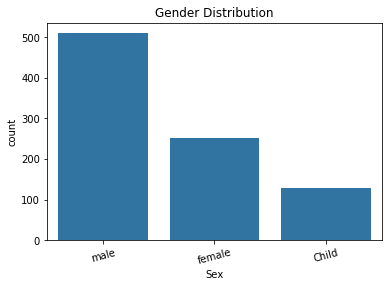

In [106]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Sex',color = base_color)
plt.xticks(rotation = 15)
plt.title("Gender Distribution");

*It is quite evident and significant differences in gender. The order follows like Male > Female > Child*

## Pclass distribution

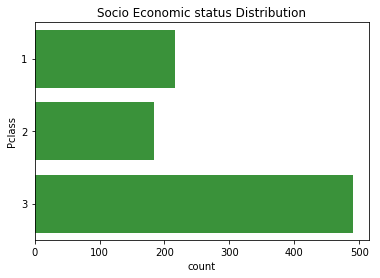

In [109]:
base_color = sb.color_palette()[2]
sb.countplot(data = df, y = 'Pclass', color = base_color)
plt.title("Socio Economic status Distribution");

*Above plot shows us Lower class passanges high in number followed by HIgh class and strangely ,iddle class are less in number*

** Replacing values in variable Survived with actual meaning, to use the same in analysis which gives us good unerstandig **

In [87]:
df = df.assign(Survived=df.Survived.map({0: "Not Survived", 1: "Survived"}))

*Below steps are first we are finding mode for embarked variable to replace missing values that we found in first step.* 

In [120]:
embarked_mode = df['Embarked'].dropna().mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

In [121]:
df['Embarked'] = df['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})

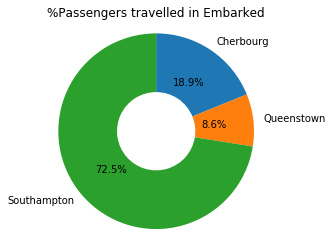

In [129]:
emb_df=df.groupby(['Embarked'])['Survived'].count()
plt.pie(emb_df, labels = emb_df.index, startangle = 90,autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.6});
plt.axis('square')
plt.title('%Passengers travelled in Embarked');


*From above donut graph we can see a huge number of passangers boarded in Southhampton followed by Cherbourg and less % in Queenstown.*

# Explanatory

## 1. Does Pclass played a role in survival ?

Text(0.5,1,'PClass Survival count')

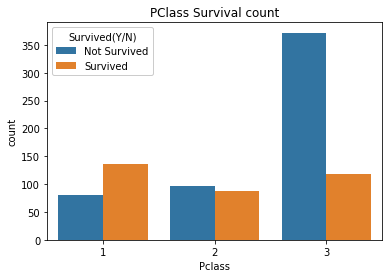

In [126]:
ax = sb.countplot(data = df, x = 'Pclass', hue = 'Survived')
ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'Survived(Y/N)')
plt.title("PClass Survival count")

*From the plot we can say Pclass had played a role. May be the safety measures provided for those who are in higher class, which could have helped them. 
They might also have got the information of accident early as compared to other classes, which would have maded them alert.*

## 2. Does Gender has an impact on survival rate ?

In [99]:
Survived = df.groupby(["Sex","Survived"])["Age"].count().reset_index().rename(columns={'Age':'Count'})
Survived

,Sex,Survived,Count
0,Child,Not Survived,59
1,Child,Survived,70
2,female,Not Survived,63
3,female,Survived,189
4,male,Not Survived,427
5,male,Survived,83


Text(0.5,1,'Gender wise Survival count')

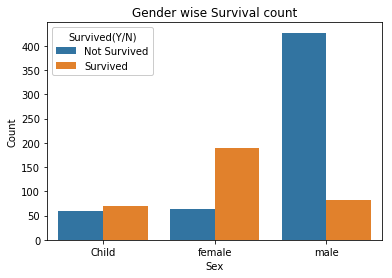

In [127]:
ax = sb.barplot(data = Survived, x = 'Sex', y = 'Count', hue = 'Survived')

ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'Survived(Y/N)')

plt.title("Gender wise Survival count")


*From above graph we can see that female and children are survived more as compared to men. Children and women would have been given more importance which could result this situation.* 

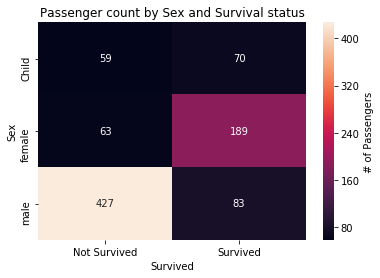

In [132]:
Pclass = df.groupby(["Sex","Survived"])["Age"].count().reset_index().rename(columns={'Age':'Count'})
Pclass = Pclass.pivot(index = 'Sex', columns = 'Survived',
                            values = 'Count')

sb.heatmap(Pclass, annot = True, fmt = '.0f',
           cbar_kws = {'label' : '# of Passengers'})
plt.title ('Passenger count by Sex and Survival status');


*From above heatmap it shows in number clearly.. female survived are high and male not survived is relatively very large. Survival rate of male is very low.*

## 3. What % passangers are board from each place ?

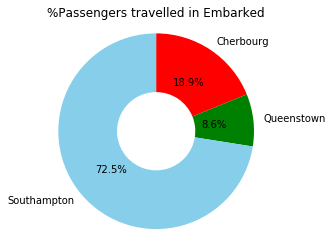

In [141]:


emb_df=df.groupby(['Embarked'])['Survived'].count()
plt.pie(emb_df, labels = emb_df.index,colors=['red','green','skyblue'],
 startangle = 90,autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.6});
plt.axis('square')
plt.title('%Passengers travelled in Embarked');


*As we discussed earlier, above donut graph we can see a % of passangers boarded in Southhampton is high i.e.72.5% followed by Cherbourg(19%) and less % in Queenstown(8.6%).*

## 4. Does Embarked has any impact on survival ? 

Text(0.5,1,'Embarked wise Survival count')

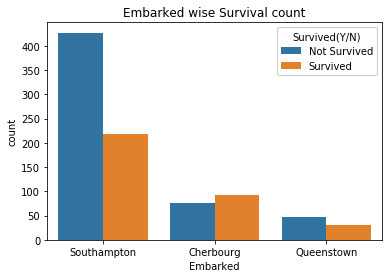

In [128]:
ax = sb.countplot(data = df, x = 'Embarked', hue = 'Survived')

ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'Survived(Y/N)')
plt.title("Embarked wise Survival count")

*We can see from the plot that most of the passangers boarded in Southhampton lost their lives. However, passangers boarded Cherbourg had high survival rate. Queenstown's case is more or less is same as Southampton but total no of passangers are less here.*

## Conclusions

*From total analysis we can say that all variables we studied during analysis had impact on survival rate. We can see variations in survival rate bases on Pclass, Gender, Embarked.
1. Pclass1 passangers' survival rate is high than other classes.
2. Female and children are survived more than male passangers.
3. Passangers boarded in southampton survival rate is low.*

## LIMITATIONS

1.We don't have any firther details regarding Pclass like what kind of extra facilities or safety measures are taken here, as we can see from our analysis survival rate is high for Pclass 1 i.e. high class. Southampton passangers survival rate is too low. No extra data on why that had happened. Were cabins given based on boarded place and were those cabins more vunerable to accident happened ?*